# Heart Disease Prediction

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [11]:
# Step 2: Load Data
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Discovery and Cleaning (EDA)

In [13]:
# Step 3: Initial Exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [20]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [22]:
 # missing value check
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
 # heart disease rate
print(df["target"].value_counts(normalize=True))

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


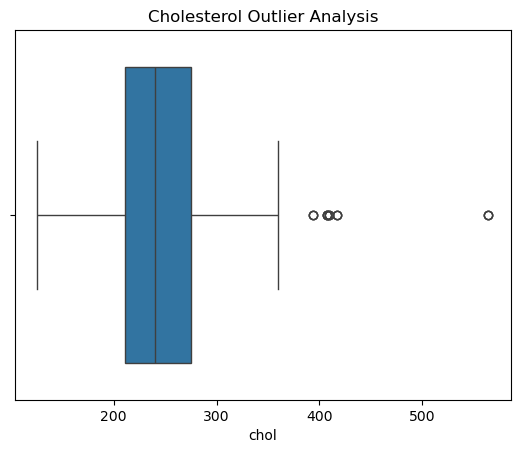

In [26]:
# Step 4: Outlier Analysis
sns.boxplot(x=df["chol"])
plt.title("Cholesterol Outlier Analysis")
plt.show()

### 3. Data Preprocessing

In [33]:
# Machine learning models work with numerical values. 
# Categorical data must be encoded and normalized if necessary.

In [63]:
# Step 5: One-hot Encoding for Categorical Variables
# Kategorik değişkenler one-hot encoding yöntemiyle sayısal hale getirilir.
categorical_cols = ["cp", "restecg", "slope", "thal", "sex", "fbs", "exang"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [37]:
# Step 6: Feature and Target Split
# Modelin öğreneceği (X) ve tahmin edeceği (y) değişkenler ayrılır.
X = df.drop("target", axis=1)
y = df["target"]

### 4. Splitting the Data Set

In [65]:
# Step 7: Train/Validation/Test Split

# Veriyi 3'e böleriz:
# - Train: Modelin öğrendiği veri
# - Validation: Modelleri karşılaştırmak için kullanılır
# - Test: Modelin hiç görmediği verideki başarısı değerlendirilir

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

###  5. Modeling

In [47]:
# Step 8: Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"{name} Validation Accuracy: {acc:.2f}")

C:\Users\busra.kartal\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation Accuracy: 0.86
Random Forest Validation Accuracy: 0.99
SVM Validation Accuracy: 0.69


### 6. Performance of the Best Model on Test Data

In [51]:
# Step 9: Final Model Testing
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.9805194805194806

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.96      0.98        79

    accuracy                           0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154


Confusion Matrix:
 [[75  0]
 [ 3 76]]


In [67]:
# --- Classification Evaluation Explanation ---
# Test Accuracy: %98 — Modelin test verisindeki genel doğruluk oranı yüksek.
# Classification Report:
#   - Precision (Kesinlik): "hasta" tahmin edilenlerin ne kadarının gerçekten hasta olduğu.
#   - Recall (Duyarlılık): Gerçekten hasta olanların ne kadarının doğru tahmin edildiği.
#   - F1-Score: Precision ve recall'un harmonik ortalaması.
#   - Sonuç: Her iki sınıf için de f1-score 0.98, yani güçlü ve dengeli bir model.
# Confusion Matrix:
#   - 75 kişi hasta değil ve doğru tahmin edilmiş.
#   - 76 kişi hasta ve doğru tahmin edilmiş.
#   - 3 kişi hasta olduğu halde yanlışlıkla "hasta değil" denmiş.
#   - Yanlış pozitif yok — kimseye gereksiz yere "hastasın" denmemiş.

###  7. Model Explanation (Optional but Effective)

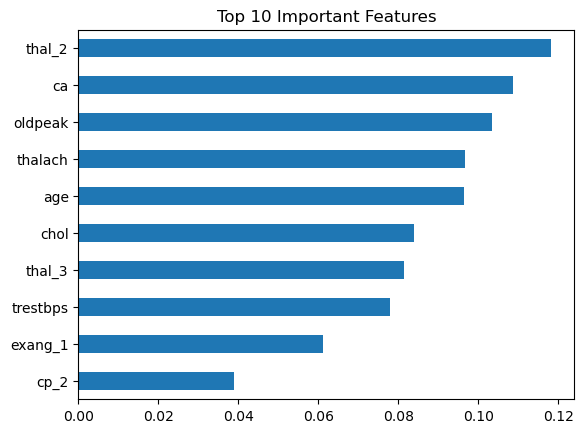

In [54]:
# Step 10: Feature Importance
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns)
feat_imp.sort_values().tail(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.show()

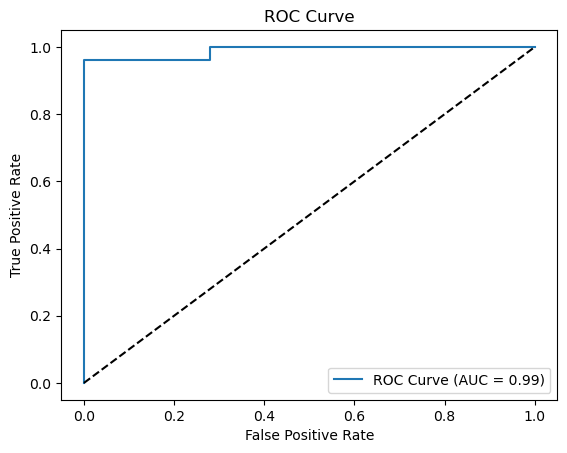

In [56]:
# Step 11: ROC Curve
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()